<h1 style="background: rgba(255, 0, 0, 0.45); width:50vw; margin-left: 25vw; text-align:center" >
ML Fondamentals - MLDM & DSC first year Master <br />
Support Vector Machines & Kernel
</h1>


<h2 style="text-decoration: underline; text-align:center">Support Vector Machines (SVM)<h2>

<p style="max-width:1000px">
We start by (trying... to) install a module that allows better visualization than the basic matplotlib:
<p>

In [1]:
!pip3 install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## First part: getting started with SVMs
This part is freely inspired by the work of Jake VenderPlas, author of the book [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do). His [GitHub](https://github.com/jakevdp/PythonDataScienceHandbook) is full of useful files.

First, we will generate toy data, linearly separable:

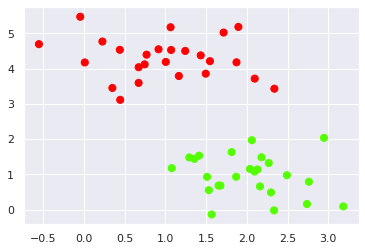

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

# a nice environment for better plots
import seaborn as sns; sns.set()

# sklearn function to generate simple artificial data
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)

# Plot
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='prism');

### Linear SVM (=wide margin perceptron)
We will start by learning a kernelless SVM (we say "linear") using scikit-learn:


NB: **C** is called the **Regularization parameter** and it is used to determine the hardness of the margin.
A small value of C will allow large margin, and with hight value we get hard margin.


In [3]:
#import of the module - that is called SVC and not SVM...
from sklearn.svm import SVC

model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

We are going to use a display function which is fine, where everything that is necessary is displayed. It does not necessarily have to be completely understood right away because we will come back to the important points below.

In [4]:
import numpy as np

def show_decision_function(model, ax=None, plot_support=True) -> None:
    """
    Plot the separator, the margins, and the support vectors of a SVM in 2D
    """
    # If no subplot axis provided,
    #  get current axis of the current figure or create one if none exists.
    if ax is None:
        ax = plt.gca()

    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create a grid for evaluation
    # Genrate 30 equally spaced points between the min and max of the x and y axis
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)

    # Create a grid of all possible combinations of the x and y values (i.e a 2D all possible coordinates points)
    Y, X = np.meshgrid(y, x)

    # Convert the grid to a list of 2D points
    # the ravel function flattens the array 2D->1D
    # and the vstack function merge the 2 arrays into one, with each array as a column
    xy = np.vstack([X.ravel(), Y.ravel()]).T

    # Evaluate the model on the grid
    # and store the distances from each points to the margin ion a 2D array.
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot hyperplane and margins 
    ax.contour(X, Y, P, 
               colors='k', # specify the color black for the contour lines
               levels=[-1, 0, 1], # draw the margin and the decision boundaries 
               alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none', edgecolor='black');
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

### ----- TESTS 1: show_decision_function----- 

Some personal test to understand whgat each function does above, this section can be skip.

In [5]:
lim1 = 0
lim2 = 5
nb_points = 5
x2 = np.linspace(lim1, lim2, nb_points)
y2 = np.linspace(-lim2, lim2, nb_points)
print(x2)
print(y2)

[0.   1.25 2.5  3.75 5.  ]
[-5.  -2.5  0.   2.5  5. ]


In [6]:
X2, Y2 = np.meshgrid(x2, y2)
print(X2)
print(Y2)

[[0.   1.25 2.5  3.75 5.  ]
 [0.   1.25 2.5  3.75 5.  ]
 [0.   1.25 2.5  3.75 5.  ]
 [0.   1.25 2.5  3.75 5.  ]
 [0.   1.25 2.5  3.75 5.  ]]
[[-5.  -5.  -5.  -5.  -5. ]
 [-2.5 -2.5 -2.5 -2.5 -2.5]
 [ 0.   0.   0.   0.   0. ]
 [ 2.5  2.5  2.5  2.5  2.5]
 [ 5.   5.   5.   5.   5. ]]


In [7]:
X2.ravel() # reduce the array from 2D to 1D

array([0.  , 1.25, 2.5 , 3.75, 5.  , 0.  , 1.25, 2.5 , 3.75, 5.  , 0.  ,
       1.25, 2.5 , 3.75, 5.  , 0.  , 1.25, 2.5 , 3.75, 5.  , 0.  , 1.25,
       2.5 , 3.75, 5.  ])

In [8]:
# make all possible combinations of the x and y values
for i, j in zip(X2.ravel(), Y2.ravel()):
    print(i, j)

0.0 -5.0
1.25 -5.0
2.5 -5.0
3.75 -5.0
5.0 -5.0
0.0 -2.5
1.25 -2.5
2.5 -2.5
3.75 -2.5
5.0 -2.5
0.0 0.0
1.25 0.0
2.5 0.0
3.75 0.0
5.0 0.0
0.0 2.5
1.25 2.5
2.5 2.5
3.75 2.5
5.0 2.5
0.0 5.0
1.25 5.0
2.5 5.0
3.75 5.0
5.0 5.0


In [9]:
xy2 = np.vstack([X2.ravel(), Y2.ravel()])
print(xy2)
xy2 =xy2.T # transpose the array in order to get coordinates points
print(xy2)

[[ 0.    1.25  2.5   3.75  5.    0.    1.25  2.5   3.75  5.    0.    1.25
   2.5   3.75  5.    0.    1.25  2.5   3.75  5.    0.    1.25  2.5   3.75
   5.  ]
 [-5.   -5.   -5.   -5.   -5.   -2.5  -2.5  -2.5  -2.5  -2.5   0.    0.
   0.    0.    0.    2.5   2.5   2.5   2.5   2.5   5.    5.    5.    5.
   5.  ]]
[[ 0.   -5.  ]
 [ 1.25 -5.  ]
 [ 2.5  -5.  ]
 [ 3.75 -5.  ]
 [ 5.   -5.  ]
 [ 0.   -2.5 ]
 [ 1.25 -2.5 ]
 [ 2.5  -2.5 ]
 [ 3.75 -2.5 ]
 [ 5.   -2.5 ]
 [ 0.    0.  ]
 [ 1.25  0.  ]
 [ 2.5   0.  ]
 [ 3.75  0.  ]
 [ 5.    0.  ]
 [ 0.    2.5 ]
 [ 1.25  2.5 ]
 [ 2.5   2.5 ]
 [ 3.75  2.5 ]
 [ 5.    2.5 ]
 [ 0.    5.  ]
 [ 1.25  5.  ]
 [ 2.5   5.  ]
 [ 3.75  5.  ]
 [ 5.    5.  ]]


In [10]:
m2 =model.decision_function(xy2) # returbn 1D array => need to reshape in 2D array in order to get the distance from the boundary of each point
print(m2)                        # row is the x value, column is the y value

[10.35888065 10.65295182 10.94702299 11.24109417 11.53516534  6.82761109
  7.12168226  7.41575343  7.7098246   8.00389577  3.29634152  3.59041269
  3.88448386  4.17855503  4.4726262  -0.23492805  0.05914312  0.35321429
  0.64728546  0.94135663 -3.76619762 -3.47212645 -3.17805528 -2.88398411
 -2.58991294]


In [11]:
m2 = m2.reshape(X2.shape)
print(m2)

[[10.35888065 10.65295182 10.94702299 11.24109417 11.53516534]
 [ 6.82761109  7.12168226  7.41575343  7.7098246   8.00389577]
 [ 3.29634152  3.59041269  3.88448386  4.17855503  4.4726262 ]
 [-0.23492805  0.05914312  0.35321429  0.64728546  0.94135663]
 [-3.76619762 -3.47212645 -3.17805528 -2.88398411 -2.58991294]]


----- END TESTS 1 -----


### Display of an SVM

Let's see what this looks like on our wide-margin linear separator:

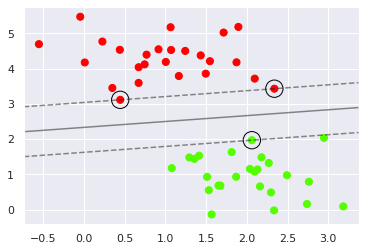

In [12]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='prism')
show_decision_function(model);

On this graph, we see the separator (solid line), the support vectors (circled points) and the margin (materialized by broken lines).
Here we have the separator that maximizes the margin.
Scikit-learn allows us, after learning, to retrieve the support vectors:

In [13]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

### Number of support vector needed

Only three data are useful for classifying new data. We can ensure this by adding data without changing the model:

In [14]:
X2, y2 = make_blobs(n_samples=200, centers=2,
                  random_state=0, cluster_std=0.60)

model2 = SVC(kernel='linear', C=1E10)
model2.fit(X2, y2)

plt.scatter(X2[:, 0], X2[:, 1], c=y2, s=50, cmap='prism')
show_decision_function(model2);

### Nonlinear SVM
As we saw during the course, the power of linear separators is limited (to linearly separable data). <br />
But it is possible to work around this limitation by using kernels.

We will start by generating non-linearly separable data:

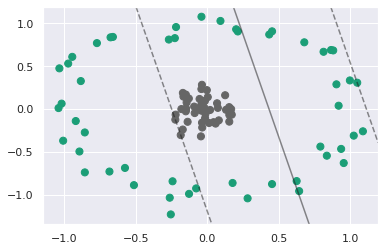

In [15]:
from sklearn.datasets import make_circles

X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='Dark2')
show_decision_function(clf, plot_support=False)

Clearly our linear separator learning failed...

We will manually add a third dimension *z*:

In [16]:
z = np.exp(-(X ** 2).sum(1))
print(z.shape, z[:5])

(100,) [0.993      0.99670941 0.99018289 0.9991881  0.31862512]


We can display the augmented data and realize that they are linearly separable:

Text(0.5, 0, 'z')

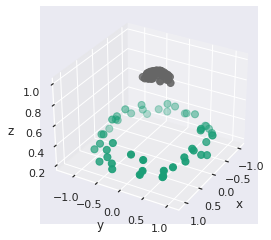

In [17]:
from mpl_toolkits.mplot3d import Axes3D

ax = plt.subplot(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], z, c=y, s=50, cmap='Dark2')
ax.view_init(elev=30, azim=30)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

The plan defined by z=0.7 (for example) separates the 2 classes perfectly.

Of course, the projection in higher dimension is essential, and by choosing another calculation for *z* we would have obtained in most cases nonlinearly separable data.

And if it were actually necessary to make the projection, that would drastically limit the dimension of the embedding space as well as the number of data that can be processed. This is why the use of kernels is very efficient.

In Scikit-Learn, it is enough to modify the parameter *kernel*: until now, we used 'linear' as value.<br />
 We can for example use *rbf* for 'radial basis function', the Gaussian kernel, and we still have to find the right value of the parameter:

In [18]:
clf = SVC(kernel='rbf', gamma='auto', C=1E10)
clf.fit(X, y)

SVC(C=10000000000.0, gamma='auto')

NB: **gamma** is to control the closeness of the model from the training data.
The highter it is the closer the model is from the training data.

In [19]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='Dark2')
show_decision_function(clf) 

We see here that the separator (and the associated margin) are not linear in the data space, but that they can be represented there without difficulty.

Note also that the number of support vectors remains very small.

### Soft Margin SVM

It is also possible that the problem is linearly separable (in the initial dimension of the data or in an embedding) but that **the noise**
 (= the poor quality of the data) **prevents the learner from finding a separator**.

We then use what is called a **soft-margin classifier**: we then allow certain points to be in the margin. This is the role of the *C* parameter: for large values, we are almost at a hard margin, but the smaller *C* value is, the more the margins become permissible.

We will take data that overlaps a little:

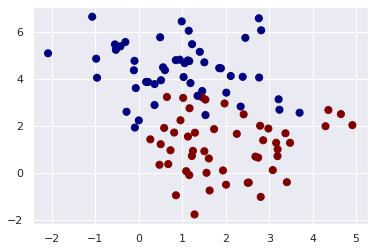

In [20]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='jet');

We then play with the value of *C*

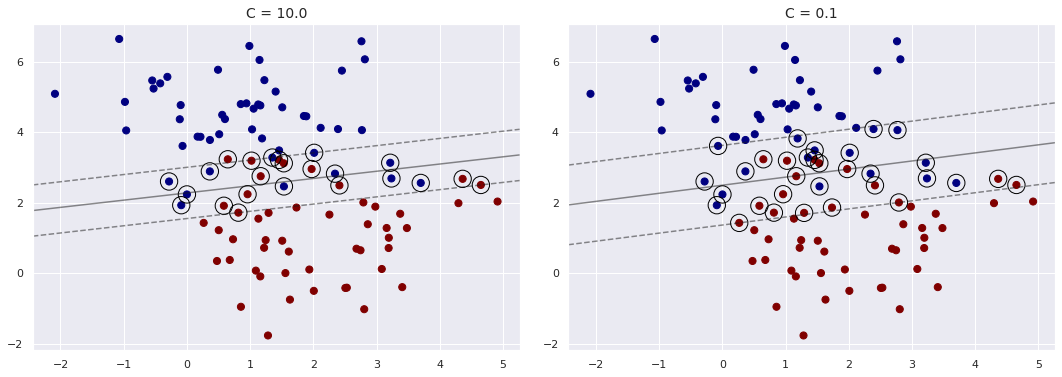

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='jet')
    show_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

Of course, it is possible to combine the use of a kernel and soft margins.

### Tuning an SVM
All kernels are parameterized: the question here is about studying the impact of a (hyper)parameter on the quality of learning.
We will generate data that are not linearly separable:

In [22]:
from sklearn.datasets import make_blobs
n_samples = 50
X, y = make_blobs(n_samples=n_samples, centers=2,
                  random_state=0, cluster_std=1.3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='prism')

We will study 2 different kernels
- the polynomial kernel (*kernel='poly'*) which has 2 parameters, *degree* which must be varied between 2 and 6 (at least), and *C* (related to the 'softness' of the margin)
- the Gaussian kernel (*kernel='rbf'*) which also has 2 parameters,*gamma*, which must be varied from 1 to 0.01, and*C*

Each time, in addition to the display of the separators, it would be interesting to look at how many support vectors the learned classifier needs.

Up to you !

Reminders:

- Polynomial Kernel: $\huge (\sum \limits ^d _{i=1} x_i x'_i + c)^{degree}$

- Gaussian Kernel: $\huge exp(-\frac{\|x-x'\|^2}{2(gamma)^2})$


How to **create Subplots** with mathplotlib and seasborn:
```python
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

X = np.array(...) -> X.sphere -> (10, 2)
Y = np.array(...) -> Y.sphere -> (10, 1)

# create the subplots:
nb_lines = 3
nb_columns = 1
hauteur = 24
largeur = 8
fig, ax = plt.subplots(nb_lines, nb_columns, figsize=(largeur, hauteur))

for i in range(3)
    ax[i].scatter(X[, 0], X[, 1], c=Y, label='scatter')
    sns.scatterplot(x=X[, 0], y=X[, 1], c=Y, label='sns plot', ax=ax[i])
    ax[i].title('title {}'.format(i+1))

fig.settitle("TITLE")
plt.show()

```


#### Libraries import

In [23]:
import matplotlib.pyplot as plt
from matplotlib import colormaps
from sklearn.svm import SVC
import seaborn as sns; sns.set()

#### Study of polynomial kernels

##### Parameters

In [24]:
C = 1E10
nb_lines = 3
nb_columns = 1
hauteur = 24
largeur = 8
cmap = colormaps['cool'] # to change the defaults colors blacks/white of points

##### Drawing plots

Number of support vectors (over 50 data) 10
Number of support vectors (over 50 data) 11
Number of support vectors (over 50 data) 8


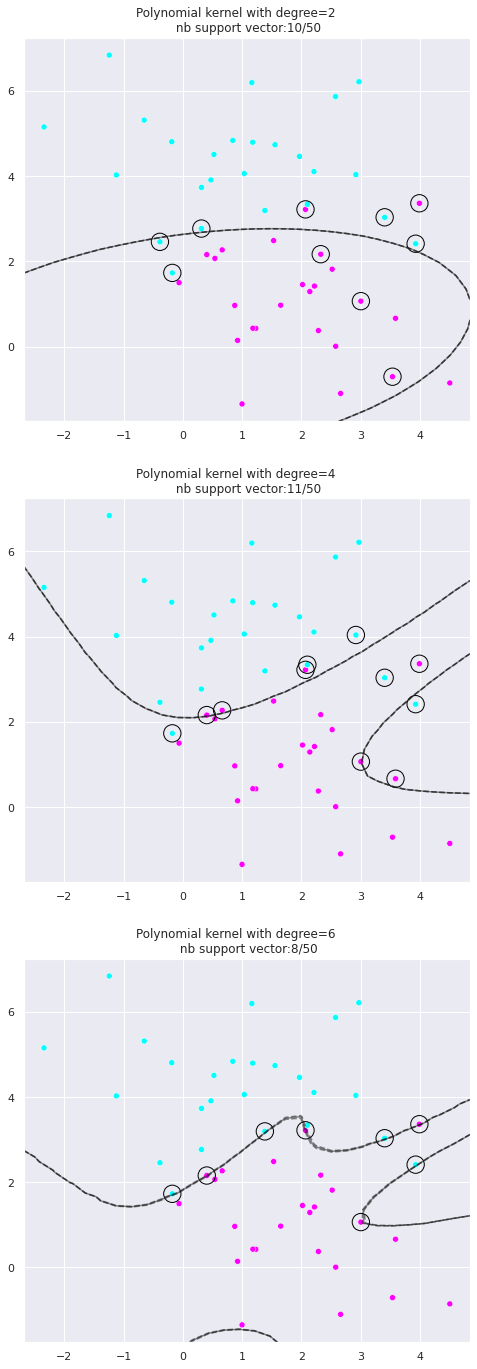

In [25]:
ig, ax = plt.subplots(nb_lines, nb_columns, figsize=(largeur, hauteur))
# Study of polynomial kernels
for p in range(2, 7, 2):
    # create the SVM model
    clf = SVC(kernel="poly", degree=p, C=C)
    clf.fit(X, y)

    # draw the subplots
    line = int(p/2 - 1)
    ax[line].title.set_text(
      f'Polynomial kernel with degree={p}\
      \n nb support vector:{len(clf.support_vectors_)}/{n_samples}'
    )
    
    #ax[line].scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='prism')
    sns.scatterplot(
        x=X[:, 0], y=X[:, 1],
        c=y, ax=ax[line],
        legend='full', cmap=cmap
        )

    show_decision_function(clf, ax=ax[line]) 

    print('Number of support vectors (over', n_samples,'data)', len(clf.support_vectors_))

##### Interpretation

We can see that the complexity of the shape of the margin increase with the degree of the SVM model, but that complexity not necessary leads to have more support vector. <br />
In fact here with degree 6 we have 8 support vector out of 50 whereas with a degree 2 we have 10 of them.

#### Study of Gaussian kernels

##### Parameters

In [26]:
nb_lines = 5
nb_columns = 1
hauteur = 24
largeur = 8
cmap = colormaps['cool'] # to change the defaults colors blacks/white of points

##### Drawing plots

In [27]:
fig, ax = plt.subplots(nb_lines, nb_columns, figsize=(largeur, hauteur))
line = 0

for gamma in range(100, 0, -20):
    # create the SVM model
    gamma = gamma/100
    clf = SVC(kernel="rbf", gamma=gamma, C=C)
    clf.fit(X, y)

    # draw the subplots
    ax[line].title.set_text(
      f'Gaussian kernel with gamma={gamma}\
      \n nb support vector:{len(clf.support_vectors_)}/{n_samples}'
    )

    sns.scatterplot(
        x=X[:, 0], y=X[:, 1],
        c=y, ax=ax[line],
        legend='full',
        label=['0', '1'],
        cmap=cmap
        )

    show_decision_function(clf, ax=ax[line]) 

    line += 1

    print('Number of support vectors (over', n_samples,'data)', len(clf.support_vectors_))

Number of support vectors (over 50 data) 26
Number of support vectors (over 50 data) 22
Number of support vectors (over 50 data) 20
Number of support vectors (over 50 data) 15
Number of support vectors (over 50 data) 10


##### Interpretation

We can see that closer the value of gamma is to 1, more the model overfit the trainning sample.

#### Example with gaussian kernel and some values for gamma and C 

Number of support vectors (over 200 data) 7


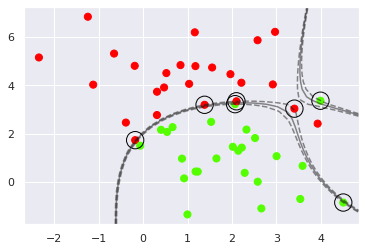

In [28]:
clf = SVC(kernel='rbf', gamma=0.01, C=1E10)
clf.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='prism')
show_decision_function(clf) 
print("Number of support vectors (over 200 data)", len(clf.support_vectors_))

## Second part: an (almost) complete treatment


### Data Preparation

#### Import for the section

In [29]:
import numpy as np

# to discretize data by associated to them a cluster
from sklearn.cluster import KMeans

# for drawing the clusters
import pandas as pd
import seaborn as sns; sns.set()

#### Building input X and output Y vectors

##### Loading data

We will use a real dataset - taken from *Tsanas & Xifara: Accurate quantitative estimation of energy performance of residential buildings using statistical machine learning tools, Energy and Buildings, Vol. 49, p. 560-567, 2012* - which you need to download first:

In [30]:
!wget https://remieyraud.github.io/data.csv

--2023-03-07 21:03:23--  https://remieyraud.github.io/data.csv
Resolving remieyraud.github.io (remieyraud.github.io)... 185.199.109.153, 185.199.108.153, 185.199.110.153, ...
Connecting to remieyraud.github.io (remieyraud.github.io)|185.199.109.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 39915 (39K) [text/csv]
Saving to: ‘data.csv’

data.csv            100%[===================>]  38.98K  --.-KB/s    in 0.003s  

2023-03-07 21:03:24 (11.4 MB/s) - ‘data.csv’ saved [39915/39915]



The first 8 columns are descriptive attributes and the last two are heating and cooling loads (in that order).<br />
To use them in Python, you can use the following code:

In [31]:
data = np.loadtxt("./data.csv")
X = data[:,:-2]
Y = data[:,-2:]
Yheat = Y[:,0]
Ycool = Y[:,1]

##### Discretize data

The original problem, as presented here, is a regression problem. We will first turn it into a classification problem. Using a clustering method, we want to divide the heating and cooling loads into 3 classes: low, medium, high.

Up to you :
- scikit clustering [doc](https://scikit-learn.org/stable/modules/clustering.html)
- KMeans [doc](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

In [32]:
# What's next ? We want to define a k-means classifier with k=3
#then use "fit"  on the 2 sets of potential Y values
# The only trick: the Y are vectors while sklearn classifiers need arrays:
# you need to reshape them: Yheat_array = Yheat.reshape(-1,1)
heat_classifier = KMeans(n_clusters=3, n_init=10).fit(Yheat.reshape(-1,1))
cool_classifier = KMeans(n_clusters=3, n_init=10).fit(Ycool.reshape(-1,1))

# After the training, assigned classes are stored in my_classifier.labels_
print(heat_classifier.labels_[:15])
print(cool_classifier.labels_[:15])


# Let's visualize the clusters
# To see if 0 correspond to the low values and 3 to the higher.
df_heat = pd.DataFrame({'X': Yheat, 'Y': heat_classifier.labels_ ,'Cluster': heat_classifier.labels_})
df_cool = pd.DataFrame({'X': Ycool, 'Y': cool_classifier.labels_ ,'Cluster': cool_classifier.labels_})

# Use pairplot to visualize the clusters for each feature
sns.scatterplot(data=df_heat, x='X', y='Y', hue='Cluster', palette='deep')
ax = sns.scatterplot(data=df_cool, x='X', y='Y', hue='Cluster', palette='cool')
ax.set(xlabel='Features Yheat-Ycool values to discretize', ylabel='Cluster label of each values', title='K-means clustering of Yheat-Ycool values')

[0 0 0 0 2 2 2 0 0 0 0 0 0 0 0]
[0 0 0 0 2 2 2 2 2 0 2 2 2 0 0]


[Text(0.5, 0, 'Features Yheat-Ycool values to discretize'),
 Text(0, 0.5, 'Cluster label of each values'),
 Text(0.5, 1.0, 'K-means clustering of Yheat-Ycool values')]

In [33]:
print(Yheat.shape[0], Ycool.shape[0])

768 768


In [34]:
help(heat_classifier)

Help on KMeans in module sklearn.cluster._kmeans object:

class KMeans(_BaseKMeans)
 |  KMeans(n_clusters=8, *, init='k-means++', n_init='warn', max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')
 |  
 |  K-Means clustering.
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, default=8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
 |      Method for initialization:
 |  
 |      'k-means++' : selects initial cluster centroids using sampling based on
 |      an empirical probability distribution of the points' contribution to the
 |      overall inertia. This technique speeds up convergence. The algorithm
 |      implemented is "greedy k-means++". It differs from the vanilla k-means++
 |      by making several 

In [35]:
# rename variables for clarity
Yheat = heat_classifier.labels_
Ycool = cool_classifier.labels_

### Learning

We want to compare several learning methods:
1. K-nearest neighbors (*KNeighborsClassifier* of class *sklearn.neighbors*, hyperparameter to tune: *n_neighbors*)
2. Decision trees (*DecisionTreeClassifier* of class *sklearn.tree*, hyperparameter to tune: *max_depth*)
3. Gaussian Kernel SVM (*SVC* with *kernel='rbf'* of class *sklearn.svm*, hyperparameter to tune: *gamma* )
4. Polynomial kernel SVM (*SVC* with *kernel='poly'* of class *sklearn.svm*, hyperparameter to set: *degree* )

Write code to:
1. Separate the data into a training sample and a test sample (80/20)
2. Select the best values ​​of the hyperparameters on the training sample by cross-validation using 10 folders

##### Imports for the learning part

In [36]:
from sklearn.model_selection import train_test_split

# to tune the parameters of the model
from sklearn.model_selection import GridSearchCV

# The learning algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# To learn the model with both parameters (cool and heat) at the same time
from sklearn.multioutput import MultiOutputClassifier

# To draw some plots
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd


In [37]:
# a plotting library for dynamicly resize the plots that I want to try.
!pip install --user plotly
!pip install --user nbformat
!pip install --user ipywidgets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.4 MB/s eta 0:00:00


In [38]:
import plotly.graph_objs as go
import ipywidgets as widgets # jupyter widget like slidebar to dynamically change parameters of the plot
from ipywidgets import interactive_output
from IPython.display import display # because the fig.show() methods always create a new figure, so we need this function to display change on the same figure.
from ipywidgets import interact # decorator for update function.

[link documentation](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20Basics.html) for creating jupiter widget to interact with the user.

#### 1. Split data set

In [39]:
# Separate the data into a training sample and a test sample (80/20)
X_train, X_test, Yheat_train, Yheat_test, Ycool_train, Ycool_test = train_test_split(X, Yheat, Ycool, test_size=0.2, random_state=42)

In [40]:
# some display to see if each of our sample has the same size depending on which set they belong:
print(X_train.shape, X_test.shape, Yheat_train.shape, Yheat_test.shape, Ycool_train.shape, Ycool_test.shape)

(614, 8) (154, 8) (614,) (154,) (614,) (154,)


Before starting to learn our model, a question arise : do we need to consider Yheat and Ycool prediction separetly or together ? <br />
Since the problem concern the Energy performance of building, I thinks these two caracteristics are correlated, thus need to be predicted at the same time by the model. <br />

So we need to group the Y classes into a vector:

In [41]:
Y_train = np.concatenate((Yheat_train.reshape(-1,1), Ycool_train.reshape(-1,1)), axis=1)
Y_test = np.concatenate((Yheat_test.reshape(-1,1), Ycool_test.reshape(-1,1)), axis=1)

In [42]:
# To see if I didn't make a mistake when transforming the vector shape.
Y_train[:10]

array([[2, 2],
       [0, 0],
       [2, 2],
       [1, 2],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0]], dtype=int32)

#### 2. Chose best param for each model using cross-validation

To tune the parameter the GridSearchCV function from the sklearn.model_selection is used, it allows us to give a list of values for parameter and after running the algorithm, we can get the best values:
- [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
- [doc for tuning a parameter](https://scikit-learn.org/stable/modules/grid_search.html#grid-search)

There is an over function called RandomizedSearchCV, that do the same thing but it takes a distribution for the hyperparameter to tune.

see also: 
- [HalvingGridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.HalvingGridSearchCV.html#sklearn.model_selection.HalvingGridSearchCV) and [HalvingRandomSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.HalvingRandomSearchCV.html#sklearn.model_selection.HalvingRandomSearchCV) that divide by 2 the range of possible values at each step.
- [Bayesian search](https://medium.com/@ali.soleymani.co/stop-using-grid-search-or-random-search-for-hyperparameter-tuning-c2468a2ff887)that use Bayesian propablities to predict more accuratly the parameters.

##### Global parameters

In [43]:
# For the reproductibility of the results.
RANDOM_STATE = 42

# use to set the cv parameter of GridSearchCV function.
NB_CROSS_VALIDATION = 10

# use to set the n_jobs parameter of GridSearchCV function, -1 means use all available cores
NB_JOBS = -1

# use to set the verbose parameter of GridSearchCV function, {0, 1, 2, 3} to have more or less information messages
VERBOSE = 3

# Used for plotting the results of the grid search function, cf. below
RESULT_MEASURE = 'mean_test_score'

# For chossing the display of the plot
MATPLOTLIB, SEASBORN, PLOTLY = 0, 1, 3

NB: The gridsearchCV function store the following results (.cv_results_):

- mean_test_score is a NumPy array containing the accuracy of the model over all cross-validation folds for each hyperparameter combination tested during the grid search.

- std_test_score: the standard deviation of the test scores for each combination of hyperparameters.

- rank_test_score: the rank of each hyperparameter combination according to the mean test score, with 1 being the best.

- mean_fit_time: the average time it takes to fit the model for each combination of hyperparameters.

- std_fit_time: the standard deviation of the fit times for each combination of hyperparameters.
 
- mean_score_time: the average time it takes to score the model for each combination of hyperparameters.

- std_score_time: the standard deviation of the score times for each combination of hyperparameters.

##### Utility functions

In [44]:
def tunnig_model_parameters(model, param_grid, X_train=X_train, Y_train=Y_train, multi_output=True) -> GridSearchCV:
    """ 
    This function is used to find best parameters for a model behind the array of values provided in param_grid.
    Parameters:
    ----------
        model: the model to be tuned
        param_grid: the array of values to be tested
        X_train: the training set, default the global variable X_train
        Y_train: the training set, default the global variable Y_train
    Returns:
    -------
        The GridSearchCV object in which we can find:
            - the best parameters: mult_clf_grid.best_params_
            - the best score: mult_clf_grid.best_score_
            - the best estimator: mult_clf_grid.best_estimator_
            - ... (see https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
    """
    if multi_output:
        # embedde the model in a MultiOutputClassifier to be able to learn both parameters at the same time (cool and heat)
        mult_clf = MultiOutputClassifier(model)
    else:
        mult_clf = model

    # Use GridSearchCV to find the best parameters
    mult_clf_grid = GridSearchCV(estimator=mult_clf, param_grid=param_grid, cv=NB_CROSS_VALIDATION, n_jobs=NB_JOBS, verbose=VERBOSE)
    # TODO: remove debugg message
    print("X_train.shape:", X_train.shape)
    print("Y_train.shape:", Y_train.shape)
    mult_clf_grid.fit(X_train, Y_train)

    if VERBOSE > 0:
        print("Best parameters:", mult_clf_grid.best_params_)
        print("Best score:", mult_clf_grid.best_score_)

    return mult_clf_grid

In [45]:
SLIDER_MIN, SLIDER_MAX, SLIDER_STEP = 1, 100, 1

In [46]:
dynamic_max_param_found = -1 # used to store the max value of the parameter that has been tunned, when we update the plot dynamicaly
def ploting_tuning_parameters_results(mult_clf_grid, tunned_param_name, plot_library_to_use=MATPLOTLIB) -> None:
    """
    This function is used to plot the results of the grid search function.
    It plot accuracy of the model depending of the value of the tunned_param_name
    Parameters:
    ----------
        mult_clf_grid: the GridSearchCV object returned by the function tunnig_model_parameters
        tunned_param_name: the name of the parameter that has been tunned
        plot_library_to_use: the library to use to plot the results, default matplotlib
    """
    # 1. construct the values array for the axis
    tunned_params = mult_clf_grid.cv_results_['params'] # get all the parameters tested, in our case just one, I just do it like that if I want to improve this function later to handle more parameters to display
    X = [p[tunned_param_name] for p in tunned_params] # get the discrete values tested to tunne the parameter
    Y = mult_clf_grid.cv_results_[RESULT_MEASURE]

    # 2. Make the differents labels
    X_label = tunned_param_name
    Y_label = RESULT_MEASURE
    plot_label = mult_clf_grid.best_estimator_.estimators_[0].__class__.__name__ 
    plot_label += ": tuning of " + tunned_param_name.replace('estimator__', '') + " parameter"

    # 3. Build the plot, depending on the library to use
    if plot_library_to_use == PLOTLY:
        fig = go.Figure() # create a json object to hold the plot data
        trace = go.Scatter(x=X, y=Y, mode='markers')
        fig.add_trace(trace)

        # set plot title and axis labels
        fig.update_layout(title=plot_label, xaxis_title=X_label, yaxis_title=Y_label)

        # make a widget to interact with the plot
        current_min, current_max = X[0], X[len(X)-1]
        range_slider = widgets.IntRangeSlider(
            value=[current_min, current_max], 
            min=SLIDER_MIN, max=SLIDER_MAX, step=SLIDER_STEP,
            description=tunned_param_name.replace('estimator__', '')+" range:",
            readout=True, readout_format="d"
        )

        # The callback funtion for the slider event
        #NB: needs to be defined here because we want to access the GridSearchCV object to recompute some values.
        def update_plot_range_slider(range_values):
            # as a closure function we need to define the local params we want to keep in memory
            nonlocal X, Y, current_min, current_max, mult_clf_grid, tunned_param_name
            nonlocal fig, trace
            global X_train, Y_train
            global dynamic_max_param_found
            estimator_class = mult_clf_grid.best_estimator_.estimator.__class__ # to instanciate a new instance of its class, because taking the best estimator and changing its parameters does not work

            # if the min and max are outside the computed range we need to computes the new values:
            # using the best estimator of GridSearch result and a new param_grid
            if range_values[0] < current_min:
                param_grid = {tunned_param_name: np.arange(range_values[0], current_min, SLIDER_STEP)}    
                print("Compute new values: ", param_grid)           
                mult_clf_grid = tunnig_model_parameters(estimator_class(), param_grid)
                print("Done")

                tunned_params = mult_clf_grid.cv_results_['params']
                X = [p[tunned_param_name] for p in tunned_params] + X
                Y = mult_clf_grid.cv_results_[RESULT_MEASURE] + Y

                current_min = range_values[0]

                          
            elif range_values[1] > current_max:
                param_grid = {tunned_param_name: np.arange(current_max+1, range_values[1]+1, SLIDER_STEP)}
                print("Compute new values: ", param_grid, " estimator class ", estimator_class) 
                mult_clf_grid = tunnig_model_parameters(estimator_class(), param_grid, X_train, Y_train)
                print("Done")
                
                tunned_params = mult_clf_grid.cv_results_['params']
                X = X + [p[tunned_param_name] for p in tunned_params] 
                Y = np.append(Y, mult_clf_grid.cv_results_[RESULT_MEASURE])
                current_max = range_values[1]
            

            # update the global variable to store the max value of the parameter that has been tunned, when we update the plot dynamicaly
            dynamic_max_param_found = max(X) 

            # update the plot
            #trace.update(x=X[range_values[0]:range_values[1]], y=Y[range_values[0]:range_values[1]])
            fig.update_traces(x=X[range_values[0]:range_values[1]], y=Y[range_values[0]:range_values[1]])
            display(fig)

        # Bind the callback function with the widget
        out = interactive_output(update_plot_range_slider, {'range_values': range_slider})

        display(range_slider, out)
        # fig.show() # display made by the update function.
        return # quit here because at this end there are some common function to matplotlib and seasborn that we don't need to execute.


    if plot_library_to_use == SEASBORN:
        # NB: we can do it with matplotlib too, butI wanted to try to do it with seasborn. 
        df = pd.DataFrame({
            'tuned_param': X, 
            'mean_test_score': Y 
        })
        sns.barplot(x='tuned_param', y='mean_test_score', data=df)

    else:
        plt.plot(X, Y)


    plt.xlabel(X_label)
    plt.ylabel(Y_label)
    plt.title(plot_label)
    plt.show()


I made a more interactive display of graph using ipywidgets, because the main drawbacks to use discrete values to tunne parameter is that we can miss the best values. So it is great to modify the range dynamicly on the result graph in order to chose the best value.

- [widget list](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html) availible in juspiter notebook,
- [doc to start with ipywidget](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20Basics.html)

But it remains one issue, it's that figure is recreated each time the X range is modified even if I use the display function of IPython.display, that doens't recreate the figure unlike fig.show().

The variable **dynamic_max_param_found** store the best value found for the  parameter, in case when we dynamicaly change the range of values we find a best values than the one insede the initial range. <br />
If it is not the case we can have a train model with the best parameter from the object return by the GridSearchCV function.

edit: only works for KNN for now.


##### 1. K-nearest neighbors: tune n_neighbors

###### Params

In [47]:
MIN_NEIGHBORS, MAX_NEIGHBORS, STPEP_NEIGHBORS = 1, 20, 1

###### Tunning

In [48]:
# dictionnary of parameters to test for the decision tree classifier
# estimator__ is the prefix to use because we use a MultiOutputClassifier wrapper
knn_param_grid = {'estimator__n_neighbors': [k for k in range(MIN_NEIGHBORS, MAX_NEIGHBORS, STPEP_NEIGHBORS)]}
clf_knn = KNeighborsClassifier() # raise an error if you provide only random_state=RANDOM_STATE parameter
gridSearchCV_knn = tunnig_model_parameters(clf_knn, knn_param_grid)

X_train.shape: (614, 8)
Y_train.shape: (614, 2)
Fitting 10 folds for each of 19 candidates, totalling 190 fits
Best parameters: {'estimator__n_neighbors': 3}
Best score: 0.879402432575357


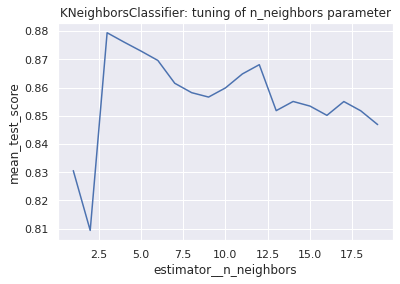

In [49]:
ploting_tuning_parameters_results(gridSearchCV_knn, 'estimator__n_neighbors')

In [50]:
ploting_tuning_parameters_results(gridSearchCV_knn, 'estimator__n_neighbors', plot_library_to_use=PLOTLY)

IntRangeSlider(value=(1, 19), description='n_neighbors range:', min=1)

Output()

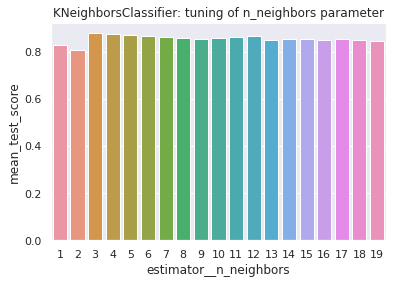

In [51]:
ploting_tuning_parameters_results(gridSearchCV_knn, 'estimator__n_neighbors', SEASBORN)

##### 2. Decision trees: tune max_depth

###### Params

In [52]:
MIN_DEPTH, MAX_DEPTH, STEP_DEPTH = 20, 201, 20
# I chose the same value as the previous TP

###### Tunning

In [53]:
dt_param_grid = {'estimator__max_depth': [d for d in range(MIN_DEPTH, MAX_DEPTH, STEP_DEPTH)]}
clf_dt = DecisionTreeClassifier(random_state=RANDOM_STATE)
gridSearchCV_dt = tunnig_model_parameters(clf_dt, dt_param_grid)

X_train.shape: (614, 8)
Y_train.shape: (614, 2)
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best parameters: {'estimator__max_depth': 20}
Best score: 0.9266261237440508


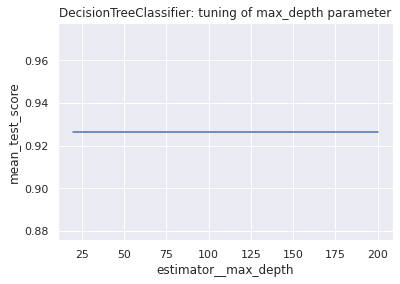

In [54]:
ploting_tuning_parameters_results(gridSearchCV_dt, 'estimator__max_depth')

In [55]:
# ploting_tuning_parameters_results(gridSearchCV_dt, 'estimator__max_depth', plot_library_to_use=PLOTLY)

##### 3. Gaussian kernel SVM: tune gamma

###### Params

In [56]:
MIN_GAMMA, MAX_GAMMA, STEP_GAMMA = 0.01, 1.01, 0.01

###### Tunning

In [57]:
svm_param_grid = {'estimator__gamma': [g for g in np.arange(MIN_GAMMA, MAX_GAMMA, STEP_GAMMA)]}
svm = SVC(kernel='rbf', random_state=RANDOM_STATE)
gridSearchCV_svm = tunnig_model_parameters(svm, svm_param_grid)

X_train.shape: (614, 8)
Y_train.shape: (614, 2)
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best parameters: {'estimator__gamma': 0.43}
Best score: 0.8615018508725543


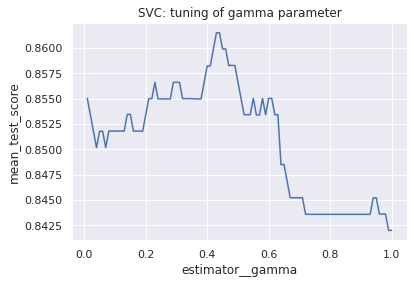

In [58]:
ploting_tuning_parameters_results(gridSearchCV_svm, 'estimator__gamma')

##### 4. Polynomial kernel SVM: tune degree

###### Params

In [59]:
MIN_P, MAX_P, STEP_P = 5, 20, 1

# edit: after plotting I see that the curve continue to increase after 9 so I change the boundaries
# from 1, 10, 1 to 5, 20, 1

###### Tunning

In [60]:
poly_svm_param_grid = {'estimator__degree': [p for p in range(MIN_P, MAX_P, STEP_P)]}
poly_svm = SVC(kernel='poly', random_state=RANDOM_STATE)
gridSearchCV_poly_svm = tunnig_model_parameters(poly_svm, poly_svm_param_grid)

X_train.shape: (614, 8)
Y_train.shape: (614, 2)
Fitting 10 folds for each of 15 candidates, totalling 150 fits
Best parameters: {'estimator__degree': 6}
Best score: 0.8501322051824433


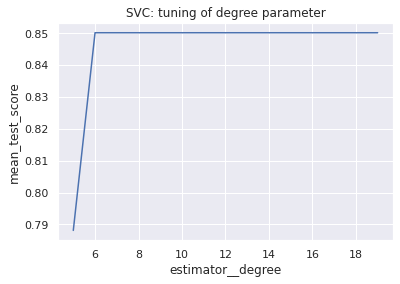

In [61]:
ploting_tuning_parameters_results(gridSearchCV_poly_svm, 'estimator__degree')

### Results analysis
Display on a curve the scores of each of the algorithms with the best possible hyperparameter value on the test sample.

#### Get the best model from the tuning parameter part

In [62]:
clf_knn = gridSearchCV_knn.best_estimator_
clf_dt = gridSearchCV_dt.best_estimator_
clf_svm = gridSearchCV_svm.best_estimator_
clf_poly_svm = gridSearchCV_poly_svm.best_estimator_

#### Get the score of each model

In [63]:
score_knn = clf_knn.score(X_test, Y_test)
score_dt = clf_dt.score(X_test, Y_test)
score_svm = clf_svm.score(X_test, Y_test)
score_poly_svm = clf_poly_svm.score(X_test, Y_test)

In [64]:
print(score_svm)

0.8246753246753247


#### Draw the scores bar chart

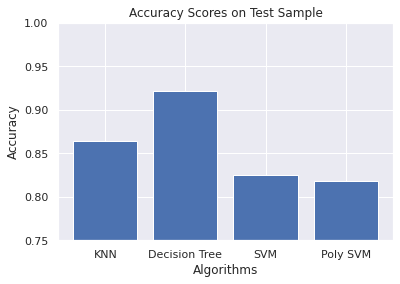

In [65]:

scores = [score_knn, score_dt, score_svm, score_poly_svm]
algorithms = ['KNN', 'Decision Tree', 'SVM', 'Poly SVM']

plt.bar(algorithms, scores)
plt.ylim(0.75, 1)
plt.title('Accuracy Scores on Test Sample')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.show()

#### Confidence interval

For each of the methods, for each best hyperparameter, calculate the 95% confidence interval to which the score must belong using the results of the cross-validation. If you do not remember how to calculate a confidence interval, you can consult: https://fr.wikihow.com/calculer-un-intervalle-de-confiance

##### Formula


Boudaries of the confidence interval: <br />
$\huge \bar{x} \pm Z_{\frac{\alpha}{2}} \times \frac{\sigma}{\sqrt{n}}$

with:
- $Z_{\alpha/2}$ is the value in the Z table s.t $ p(0 < Z < value)=\alpha/2$
- for $\alpha = 0.95$ we get the value 1.96
- $\sigma$ the standard deviation: $\sqrt{\frac{\sum{(x - \bar{x})^2}}{n}}$ 
- $\bar{x} = \frac{\sum{x}}{n}$

NB: since we test our models with cross validation, mean, std, and the sample size are all related to these folds.

##### Utility function

In [70]:
from scipy.stats import norm
CONFIDENCE_LVL = 0.95
def compute_confidence_interval(mult_grid_clf, display=False, precision=4) :
    """
    Compute the confidence interval of the mean of the scores of the cross validation.
    Parameters:
    ----------
      mult_grid_clf: GridSearchCV instance
        The GridSearchCV instance that contains the results of the cross validation.
      display: bool
        If True, display the mean, standard deviation, standard error and the confidence interval.
      precision: int
        The number of digits after the decimal point to display.
    Returns:
    -------
      confidence_interval: list[float, float]
        The confidence interval of the mean of the scores of the cross validation.
    """
    # Get the sample size in terms of folds
    nb_folds = len(mult_grid_clf.cv_results_['split0_test_score'])
    scores = mult_grid_clf.cv_results_['mean_test_score']

    # compute the mean and standard deviation
    mean_score = np.mean(scores)
    std_score = np.std(scores)

    # compute the standard error, meaning the standard deviation divided by the root of the number of folds
    stde_score = std_score / np.sqrt(nb_folds)

    # compute the z value, i.e we could take a fixed value for that, but by computing it we can compute multiple confidence intervals
    # and the norm module as a function for that: norm.ppf
    z_value = norm.ppf((1 + CONFIDENCE_LVL)/2)

    bound = z_value * stde_score
    confidence_interval = [mean_score - bound, mean_score + bound]

    if display:
        n=5
        print(f"{ mult_grid_clf.best_estimator_.estimators_[0].__class__.__name__  }: mean score = {mean_score:.{precision}f}, "
      f"{CONFIDENCE_LVL*100}% confidence interval = [{confidence_interval[0]:.{precision}f}, {confidence_interval[1]:.{precision}f}]")

    return confidence_interval


In [68]:
# some test to check the result
norm.ppf((1 + CONFIDENCE_LVL)/2)

1.959963984540054

##### Confidence interval of each estimator

In [69]:
knn_interval = compute_confidence_interval(gridSearchCV_knn, display=True, precision=3)
dt_interval = compute_confidence_interval(gridSearchCV_dt, display=True)
svm_interval = compute_confidence_interval(gridSearchCV_svm, display=True)
ploy_svm_interval = compute_confidence_interval(gridSearchCV_poly_svm, display=True)

KNeighborsClassifier: mean score = 0.856, 95.0% confidence interval = [0.849, 0.863]
DecisionTreeClassifier: mean score = 0.9266, 95.0% confidence interval = [0.9266, 0.9266]
SVC: mean score = 0.8508, 95.0% confidence interval = [0.8497, 0.8519]
SVC: mean score = 0.8460, 95.0% confidence interval = [0.8382, 0.8538]


#### Best model to predict Air conditionning and heating costs at the same time.

Which method is the best to predict the class of heating costs? Air conditioning costs?

From our study, the best method is the DecisionTreeCassifier that obtains the best score, and even the lower bound of its confidence interval is better than every over model score.<br />
After that, The KNeighborsClassifier and the SVC with gama seems to have the same perforamnce.<br />
Finally, the poly SVM has the lowest performance

#### Best model to predict Air conditionning and heating costs separetly.

With the last question I realiaze that we need to predict heat and cool separetlty, that I assume otherwise...<br />
Thus in this section heat and cool will be predict independentlty, and it will be still interesting to see if it is more performent to consider them independently or combine for the prediction. <br />

For that I reused the function **tunning_model_parameters** and add a flag to know if we are in the case of multioutput classifier or single output classifier.

##### Tuning parameters

###### Utility function

In [71]:
def ploting_tuning_parameters_results_single_output(clf_grid, tunned_param_name, feature_predict) -> None:
    """
    This function is used to plot the results of the grid search function for a classifier with one output.
    It plot accuracy of the model depending of the value of the tunned_param_name
    Parameters:
    ----------
        clf_grid: the GridSearchCV object returned by the function tunnig_model_parameters
        tunned_param_name: the name of the parameter that has been tunned
    """
    # 1. construct the values array for the axis
    tunned_params = clf_grid.cv_results_['params'] # get all the parameters tested, in our case just one, I just do it like that if I want to improve this function later to handle more parameters to display
    X = [p[tunned_param_name] for p in tunned_params] # get the discrete values tested to tunne the parameter
    Y = clf_grid.cv_results_[RESULT_MEASURE]

    # 2. Make the differents labels
    X_label = tunned_param_name
    Y_label = RESULT_MEASURE
    plot_label = clf_grid.best_estimator_.__class__.__name__ 
    plot_label += ": tuning of " + tunned_param_name + " parameter for "+feature_predict+" prediction."


    plt.plot(X, Y)
    plt.xlabel(X_label)
    plt.ylabel(Y_label)
    plt.title(plot_label)
    plt.show()

###### 1. K-nearest neighbors: tune n_neighbors

In [72]:
# dictionnary of parameters to test for the decision tree classifier
# estimator__ is the prefix to use because we use a MultiOutputClassifier wrapper
knn_param_grid = {'n_neighbors': [k for k in range(MIN_NEIGHBORS, MAX_NEIGHBORS, STPEP_NEIGHBORS)]}
clf_knn = KNeighborsClassifier() # raise an error if you provide only random_state=RANDOM_STATE parameter
gridSearchCV_knn_heat = tunnig_model_parameters(clf_knn, knn_param_grid, Y_train=Yheat_train, multi_output=False)
gridSearchCV_knn_cool = tunnig_model_parameters(clf_knn, knn_param_grid, Y_train=Ycool_train, multi_output=False)

X_train.shape: (614, 8)
Y_train.shape: (614,)
Fitting 10 folds for each of 19 candidates, totalling 190 fits
Best parameters: {'n_neighbors': 3}
Best score: 0.9348228450555262
X_train.shape: (614, 8)
Y_train.shape: (614,)
Fitting 10 folds for each of 19 candidates, totalling 190 fits
Best parameters: {'n_neighbors': 5}
Best score: 0.9202538339502908


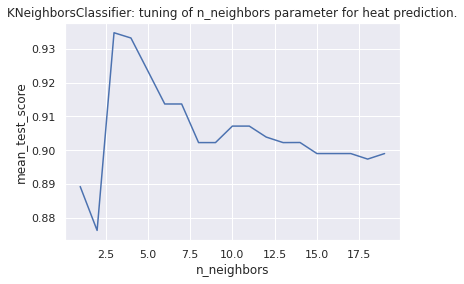

In [73]:
ploting_tuning_parameters_results_single_output(gridSearchCV_knn_heat, 'n_neighbors', "heat")

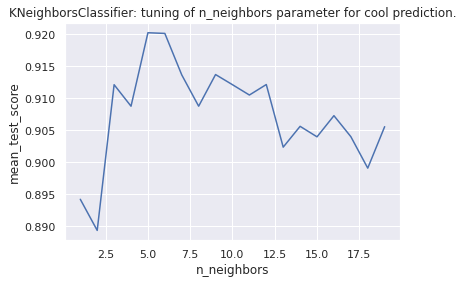

In [74]:
ploting_tuning_parameters_results_single_output(gridSearchCV_knn_cool, 'n_neighbors', "cool")

For the multioutput classifier the best value was 3, which correspond to the one for the heat prediction, the best value for the cool prediction is 4. <br />
We can also see that the pick of accuracy was 0.89 for the multioutput classifier, which is lowest compare to the 2 single output classifier.

###### 2. Decision trees: tune max_depth

In [75]:
dt_param_grid = {'max_depth': [d for d in range(MIN_DEPTH, MAX_DEPTH, STEP_DEPTH)]}
clf_dt = DecisionTreeClassifier(random_state=RANDOM_STATE)
gridSearchCV_dt_heat = tunnig_model_parameters(clf_dt, dt_param_grid, Y_train=Yheat_train, multi_output=False)
gridSearchCV_dt_cool = tunnig_model_parameters(clf_dt, dt_param_grid, Y_train=Ycool_train, multi_output=False)

X_train.shape: (614, 8)
Y_train.shape: (614,)
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best parameters: {'max_depth': 20}
Best score: 0.9902168164992068
X_train.shape: (614, 8)
Y_train.shape: (614,)
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best parameters: {'max_depth': 20}
Best score: 0.9316763617133793


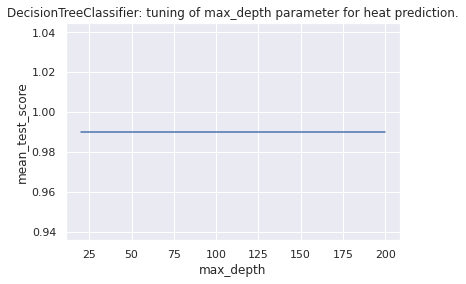

In [76]:
ploting_tuning_parameters_results_single_output(gridSearchCV_dt_heat, 'max_depth', "heat")

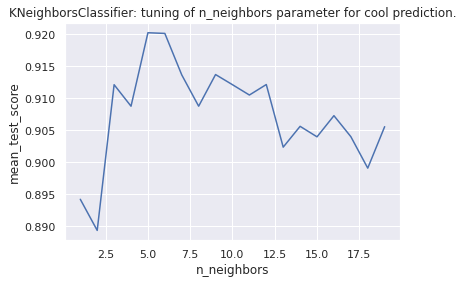

In [77]:
ploting_tuning_parameters_results_single_output(gridSearchCV_knn_cool, 'n_neighbors', "cool")

Here too we can notice that the accuracy is better when heat is predict separetly, but the cool has the same highest score than the multioutput classifier.<br />
We also see that the flatness of the score observe in the multioutput classifier is due to the heat prediction, and predicting it at the same time than the heat reduce its accuracy. <br />

###### 3. Gaussian kernel SVM: tune gamma

In [78]:
svm_param_grid = {'gamma': [g for g in np.arange(MIN_GAMMA, MAX_GAMMA, STEP_GAMMA)]}
svm = SVC(kernel='rbf', random_state=RANDOM_STATE)
gridSearchCV_svm_heat = tunnig_model_parameters(svm, svm_param_grid, Y_train=Yheat_train, multi_output=False)
gridSearchCV_svm_cool = tunnig_model_parameters(svm, svm_param_grid, Y_train=Ycool_train, multi_output=False)

X_train.shape: (614, 8)
Y_train.shape: (614,)
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best parameters: {'gamma': 0.59}
Best score: 0.91853516657853
X_train.shape: (614, 8)
Y_train.shape: (614,)
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best parameters: {'gamma': 0.21000000000000002}
Best score: 0.9088841882601798


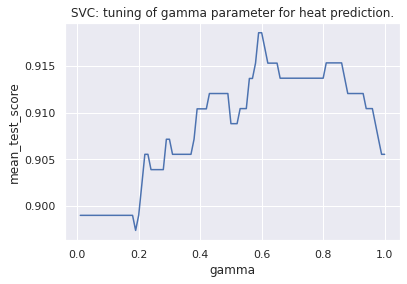

In [79]:
ploting_tuning_parameters_results_single_output(gridSearchCV_svm_heat, 'gamma', "heat")

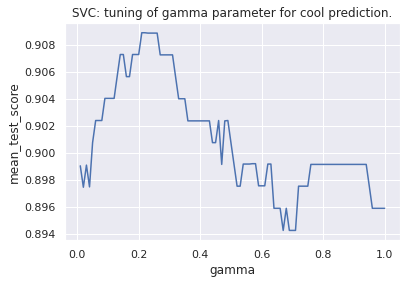

In [80]:
ploting_tuning_parameters_results_single_output(gridSearchCV_svm_cool, 'gamma', "cool")

We can see that heat and cool have opposit pick of hight arround 0.43 which is the best value for the multioutput classifier.<br />
The score is highther when we do the prediction separetly too. <br />

###### 4. Polynomial kernel SVM: tune degree

In [81]:
poly_svm_param_grid = {'degree': [p for p in range(MIN_P, MAX_P, STEP_P)]}
poly_svm = SVC(kernel='poly', random_state=RANDOM_STATE)
gridSearchCV_poly_svm_heat = tunnig_model_parameters(poly_svm, poly_svm_param_grid, Y_train=Yheat_train, multi_output=False)
gridSearchCV_poly_svm_cool = tunnig_model_parameters(poly_svm, poly_svm_param_grid, Y_train=Ycool_train, multi_output=False)

X_train.shape: (614, 8)
Y_train.shape: (614,)
Fitting 10 folds for each of 15 candidates, totalling 150 fits
Best parameters: {'degree': 6}
Best score: 0.8729772607086197
X_train.shape: (614, 8)
Y_train.shape: (614,)
Fitting 10 folds for each of 15 candidates, totalling 150 fits
Best parameters: {'degree': 6}
Best score: 0.9022739291380221


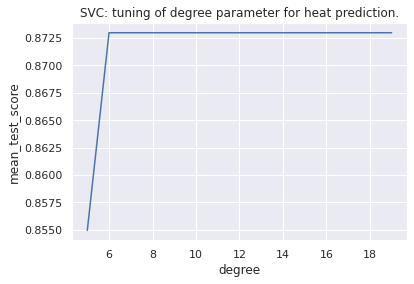

In [82]:
ploting_tuning_parameters_results_single_output(gridSearchCV_poly_svm_heat, 'degree', "heat")

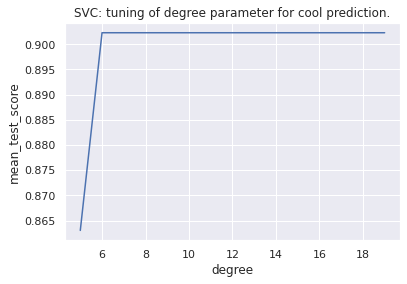

In [83]:
ploting_tuning_parameters_results_single_output(gridSearchCV_poly_svm_cool, 'degree', "cool")

Each curve become flat at some point, and the outputclassifier take the value of p where both have reach their flat part (p=10), and take the lowest score from both of them.

##### Results Analysis

Now lets test our models, but it already seem, from our observation on the tunning param step, that single output classifier outperform the prediction of multioutput classifier.<br />
Let's verify that.<br />

##### Get the best model from the tuning parameter part

In [84]:
clf_knn_heat = gridSearchCV_knn_heat.best_estimator_
clf_knn_cool = gridSearchCV_knn_cool.best_estimator_
clf_dt_heat = gridSearchCV_dt_heat.best_estimator_
clf_dt_cool = gridSearchCV_dt_cool.best_estimator_
clf_svm_heat = gridSearchCV_svm_heat.best_estimator_
clf_svm_cool = gridSearchCV_svm_cool.best_estimator_
clf_poly_svm_heat = gridSearchCV_poly_svm_heat.best_estimator_
clf_poly_svm_cool = gridSearchCV_poly_svm_cool.best_estimator_


##### Get the score of each model

In [85]:
score_knn_heat = clf_knn_heat.score(X_test, Yheat_test)
score_knn_cool = clf_knn_cool.score(X_test, Ycool_test)
score_dt_heat = clf_dt_heat.score(X_test, Yheat_test)
score_dt_cool = clf_dt_cool.score(X_test, Ycool_test)
score_svm_heat = clf_svm_heat.score(X_test, Yheat_test)
score_svm_cool = clf_svm_cool.score(X_test, Ycool_test)
score_poly_svm_heat = clf_poly_svm_heat.score(X_test, Yheat_test)
score_poly_svm_cool = clf_poly_svm_cool.score(X_test, Ycool_test)

##### Draw the scores bar chart

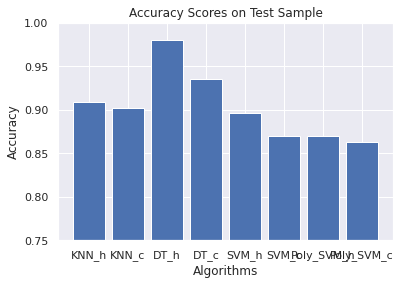

In [86]:

scores = [score_knn_heat, score_knn_cool, score_dt_heat, score_dt_cool, score_svm_heat, score_svm_cool, score_poly_svm_heat, score_poly_svm_cool]
algorithms = ['KNN_h', 'KNN_c', 'DT_h', 'DT_c', 'SVM_h', 'SVM_c', 'Poly_SVM_h', 'Poly_SVM_c']

plt.bar(algorithms, scores)
plt.ylim(0.75, 1)
plt.title('Accuracy Scores on Test Sample')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.show()

As espected the results as better than the one with the multioutputclassifier.

##### Confidence interval

In [88]:
from scipy.stats import norm
CONFIDENCE_LVL = 0.95
def compute_confidence_interval_one_output(mult_grid_clf, feature_predict, display=False, precision=4):
    """
    Compute the confidence interval of the mean of the scores of the cross validation.
    Parameters:
    ----------
      mult_grid_clf: GridSearchCV instance
        The GridSearchCV instance that contains the results of the cross validation.
      display: bool
        If True, display the mean, standard deviation, standard error and the confidence interval.
      precision: int
        The number of digits after the decimal point to display.
    Returns:
    -------
      confidence_interval: list[float, float]
        The confidence interval of the mean of the scores of the cross validation.
    """
    # Get the sample size in terms of folds
    nb_folds = len(mult_grid_clf.cv_results_['split0_test_score'])
    scores = mult_grid_clf.cv_results_['mean_test_score']

    # compute the mean and standard deviation
    mean_score = np.mean(scores)
    std_score = np.std(scores)

    # compute the standard error, meaning the standard deviation divided by the root of the number of folds
    stde_score = std_score / np.sqrt(nb_folds)

    # compute the z value, i.e we could take a fixed value for that, but by computing it we can compute multiple confidence intervals
    # and the norm module as a function for that: norm.ppf
    z_value = norm.ppf((1 + CONFIDENCE_LVL)/2)

    bound = z_value * stde_score
    confidence_interval = [mean_score - bound, mean_score + bound]

    if display:
        n=5
        print(f"{ mult_grid_clf.best_estimator_.__class__.__name__  } {feature_predict}: mean score = {mean_score:.{precision}f}, "
      f"{CONFIDENCE_LVL*100}% confidence interval = [{confidence_interval[0]:.{precision}f}, {confidence_interval[1]:.{precision}f}]")

    return confidence_interval

In [89]:
knn_heat_interval = compute_confidence_interval_one_output(gridSearchCV_knn_heat, 'heat', display=True)
knn_cool_interval = compute_confidence_interval_one_output(gridSearchCV_knn_cool, 'cool', display=True)
dt_heat_interval = compute_confidence_interval_one_output(gridSearchCV_dt_heat, 'heat', display=True)
dt_cool_interval = compute_confidence_interval_one_output(gridSearchCV_dt_cool, 'cool', display=True)
svm_heat_interval = compute_confidence_interval_one_output(gridSearchCV_svm_heat, 'heat', display=True)
svm_cool_interval = compute_confidence_interval_one_output(gridSearchCV_svm_cool, 'cool', display=True)
poly_svm_heat_interval = compute_confidence_interval_one_output(gridSearchCV_poly_svm_heat, 'heat', display=True)
poly_svm_cool_interval = compute_confidence_interval_one_output(gridSearchCV_poly_svm_cool, 'cool', display=True)



KNeighborsClassifier heat: mean score = 0.9055, 95.0% confidence interval = [0.8994, 0.9116]
KNeighborsClassifier cool: mean score = 0.9076, 95.0% confidence interval = [0.9041, 0.9110]
DecisionTreeClassifier heat: mean score = 0.9902, 95.0% confidence interval = [0.9902, 0.9902]
DecisionTreeClassifier cool: mean score = 0.9317, 95.0% confidence interval = [0.9317, 0.9317]
SVC heat: mean score = 0.9085, 95.0% confidence interval = [0.9074, 0.9097]
SVC cool: mean score = 0.9010, 95.0% confidence interval = [0.9002, 0.9017]
SVC heat: mean score = 0.8718, 95.0% confidence interval = [0.8695, 0.8741]
SVC cool: mean score = 0.8997, 95.0% confidence interval = [0.8947, 0.9046]


Here too the DecisionTree classifier is the best model to predict heat and cold. And the prediction is better when we predict them separetly.